In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Observing the data

We can see that majority of the columns don't require much effort so our main focus are the yes/no and the furnishing status columns


In [2]:
df = pd.read_csv('Housing.csv')
df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [3]:
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


# Data Manipulation

First we will map the yes/no columns to True/False layout which is understandable by the algorithms 

In [4]:
yes_no_cols = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']

# Convert yes/no to True/False
for col in yes_no_cols:
    df[col] = df[col].map({'yes': True, 'no': False})


In [5]:
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,True,False,False,False,True,2,True,furnished
1,12250000,8960,4,4,4,True,False,False,False,True,3,False,furnished
2,12250000,9960,3,2,2,True,False,True,False,False,2,True,semi-furnished
3,12215000,7500,4,2,2,True,False,True,False,True,3,True,furnished
4,11410000,7420,4,1,2,True,True,True,False,True,2,False,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,True,False,True,False,False,2,False,unfurnished
541,1767150,2400,3,1,1,False,False,False,False,False,0,False,semi-furnished
542,1750000,3620,2,1,1,True,False,False,False,False,0,False,unfurnished
543,1750000,2910,3,1,1,False,False,False,False,False,0,False,furnished


# One Hot Encoding

Now using one hot encoding we will deal the last column

In [6]:
dums = pd.get_dummies(df['furnishingstatus'],drop_first=True)
df = pd.concat([df,dums],axis=1)
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,semi-furnished,unfurnished
0,13300000,7420,4,2,3,True,False,False,False,True,2,True,furnished,False,False
1,12250000,8960,4,4,4,True,False,False,False,True,3,False,furnished,False,False
2,12250000,9960,3,2,2,True,False,True,False,False,2,True,semi-furnished,True,False
3,12215000,7500,4,2,2,True,False,True,False,True,3,True,furnished,False,False
4,11410000,7420,4,1,2,True,True,True,False,True,2,False,furnished,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,True,False,True,False,False,2,False,unfurnished,False,True
541,1767150,2400,3,1,1,False,False,False,False,False,0,False,semi-furnished,True,False
542,1750000,3620,2,1,1,True,False,False,False,False,0,False,unfurnished,False,True
543,1750000,2910,3,1,1,False,False,False,False,False,0,False,furnished,False,False


# Visualization

Using matplotlib we are able to perform the visualization of various features and their relations with one another

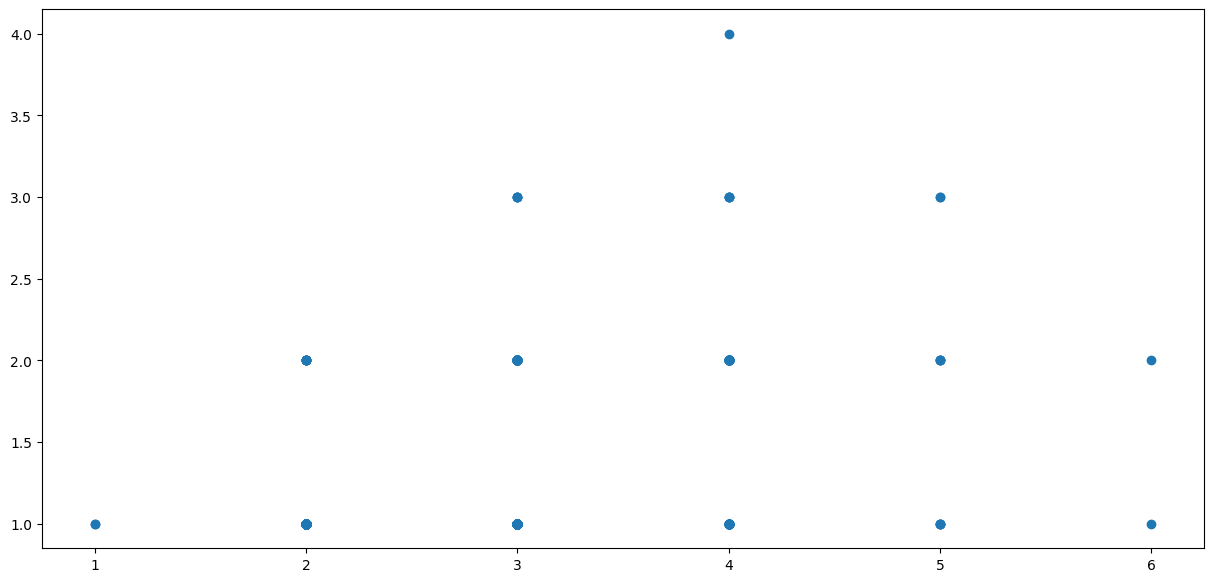

In [7]:
plt.figure(figsize=(15,7))
plt.scatter(df.bedrooms,df.bathrooms)

# Outlier Removal

Since this is a small dataset our ouliers are not that much to deal with so a simple solution would be to add a column of price per sqft which can to some extent improve our accuracy 

In [8]:
df['price_per_sqft'] = df['price']/df['area']
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,semi-furnished,unfurnished,price_per_sqft
0,13300000,7420,4,2,3,True,False,False,False,True,2,True,furnished,False,False,1792.452830
1,12250000,8960,4,4,4,True,False,False,False,True,3,False,furnished,False,False,1367.187500
2,12250000,9960,3,2,2,True,False,True,False,False,2,True,semi-furnished,True,False,1229.919679
3,12215000,7500,4,2,2,True,False,True,False,True,3,True,furnished,False,False,1628.666667
4,11410000,7420,4,1,2,True,True,True,False,True,2,False,furnished,False,False,1537.735849
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,True,False,True,False,False,2,False,unfurnished,False,True,606.666667
541,1767150,2400,3,1,1,False,False,False,False,False,0,False,semi-furnished,True,False,736.312500
542,1750000,3620,2,1,1,True,False,False,False,False,0,False,unfurnished,False,True,483.425414
543,1750000,2910,3,1,1,False,False,False,False,False,0,False,furnished,False,False,601.374570


In [9]:
df['price_per_sqft'].describe()

count     545.000000
mean      993.326978
std       346.537025
min       270.395550
25%       745.370370
50%       952.380952
75%      1184.615385
max      2640.000000
Name: price_per_sqft, dtype: float64

In [10]:
df[df['price_per_sqft']<=275]

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,semi-furnished,unfurnished,price_per_sqft
403,3500000,12944,3,1,1,True,False,False,False,False,0,False,unfurnished,False,True,270.39555


Text(0, 0.5, 'Price_Per_Sqft')

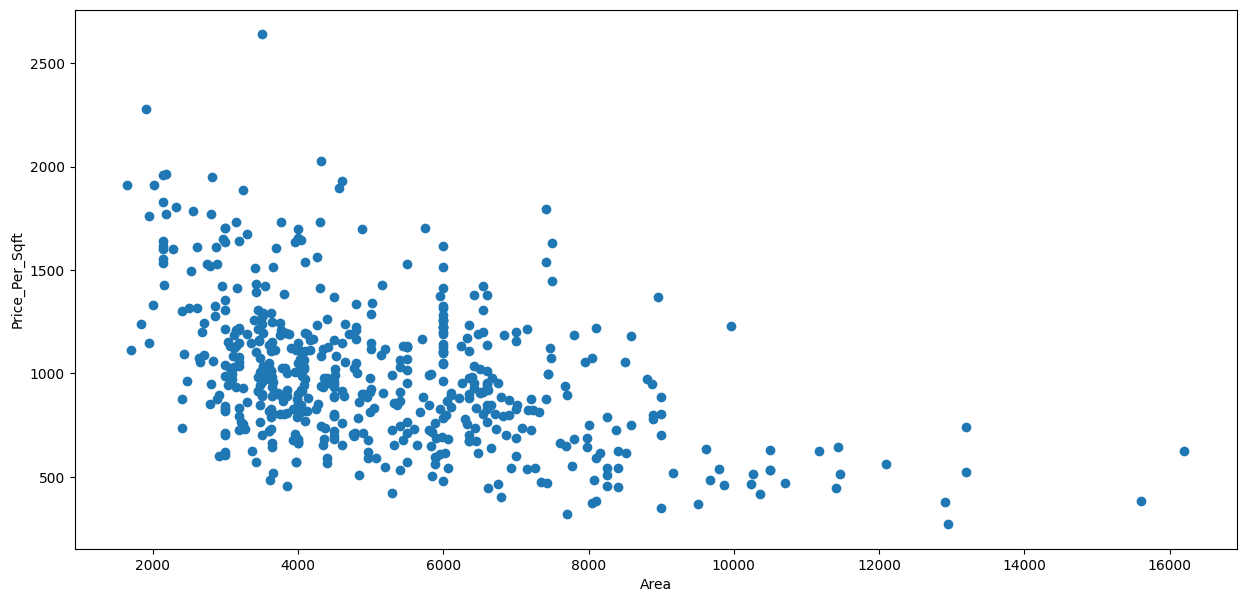

In [12]:
plt.figure(figsize=(15,7))
plt.scatter(df.area,df.price_per_sqft)
plt.xlabel('Area')
plt.ylabel('Price_Per_Sqft')

# Preparing the Data

Now after the data has been cleaned and specified we need to specify our X(indenpendent variable) and y(dependent variable) and scale the X to improve accuracy along with specifying the training and testing data

In [13]:
X = df.drop(['price','furnishingstatus'],axis=1)
y = df.price
X

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished,price_per_sqft
0,7420,4,2,3,True,False,False,False,True,2,True,False,False,1792.452830
1,8960,4,4,4,True,False,False,False,True,3,False,False,False,1367.187500
2,9960,3,2,2,True,False,True,False,False,2,True,True,False,1229.919679
3,7500,4,2,2,True,False,True,False,True,3,True,False,False,1628.666667
4,7420,4,1,2,True,True,True,False,True,2,False,False,False,1537.735849
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,3000,2,1,1,True,False,True,False,False,2,False,False,True,606.666667
541,2400,3,1,1,False,False,False,False,False,0,False,True,False,736.312500
542,3620,2,1,1,True,False,False,False,False,0,False,False,True,483.425414
543,2910,3,1,1,False,False,False,False,False,0,False,False,False,601.374570


In [14]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)
X

array([[ 1.04672629,  1.40341936,  1.42181174, ..., -0.84488844,
        -0.6964292 ,  2.30815165],
       [ 1.75700953,  1.40341936,  5.40580863, ..., -0.84488844,
        -0.6964292 ,  1.0798384 ],
       [ 2.21823241,  0.04727831,  1.42181174, ...,  1.18358821,
        -0.6964292 ,  0.68336149],
       ...,
       [-0.70592066, -1.30886273, -0.57018671, ..., -0.84488844,
         1.43589615, -1.47277195],
       [-1.03338891,  0.04727831, -0.57018671, ..., -0.84488844,
        -0.6964292 , -1.13209402],
       [-0.5998394 ,  0.04727831, -0.57018671, ..., -0.84488844,
         1.43589615, -1.55618725]])

In [46]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)
y_test

383    3570000
435    3290000
261    4473000
131    5810000
154    5530000
        ...   
11     9681000
220    4795000
281    4270000
358    3745000
54     7350000
Name: price, Length: 109, dtype: int64

# Model Selection 

Now we'll select the model with the best score on testing data
(Mostly it's Linear Regression for such problems but due to the features being more extreme in nature Decision Tree Regressor is performing well here)

In [37]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [38]:
lr.score(X_test,y_test)

0.8309356835257776

In [39]:
from sklearn.linear_model import Ridge
r = Ridge()
r.fit(X_train,y_train)

Ridge()

In [40]:
r.score(X_test,y_test)

0.8315424308792259

In [41]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor()
dtr.fit(X_train,y_train)

DecisionTreeRegressor()

In [42]:
dtr.score(X_test,y_test)

0.9314610163114616

In [53]:
dtr.predict([[1700,4,5,6,1,1,0,1,1,1,1,1,0,879.9]])

array([13300000.])

# Saving the Model

In [54]:
import pickle as pc

filename = 'House_Prediction_Model.pkl'
with open(filename, 'wb') as file:
    pc.dump(dtr, file)